## Grid Search for Hyper Parameters 
- Searching through different combinations of Hyper Params

In [15]:
# import libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import load_breast_cancer
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

from sklearn.model_selection import (
    KFold,
    GridSearchCV,
    train_test_split
)

import warnings
warnings.filterwarnings("ignore")

In [2]:
# load data

# scikit-learn dataset
# https://scikit-learn.org/stable/datasets/toy_dataset.html#breast-cancer-dataset

# dataset information: UCI Machine Learning Repository
# https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+(Diagnostic)
    
# in short, classification problem, trying to predict whether the tumor
# is malignant or benign

# load dataset
breast_cancer_X, breast_cancer_y = load_breast_cancer(return_X_y=True)
X = pd.DataFrame(breast_cancer_X)
y = pd.Series(breast_cancer_y).map({0:1, 1:0})

X.head()

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [3]:
X.shape

(569, 30)

In [4]:
# target percentage
y.value_counts()/len(y)

0    0.627417
1    0.372583
dtype: float64

In [5]:
# split dataset into a train and test set

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=0)

X_train.shape, X_test.shape

((398, 30), (171, 30))

## Grid Search

In [8]:
# set up the GBM
svm = SVC(random_state=0)

# set up the param_grid 
# passing different hyper param space combinations
param_grid = [
    {'C' : [1,10,100,1000], 'kernel' : ['linear']},
    {'C' : [1,10,100,1000], 'gamma' : [0.001, 0.0001], 'kernel' : ['rbf']}
]


# estimate generalization error using cross_validate
clf = GridSearchCV(svm,
                   param_grid=param_grid,
                   scoring='roc_auc',
                   refit=True, # refit the data with the best params
                   cv=3    # will use just 3 for speed up
                  )

search = clf.fit(X_train, y_train)

# best hyper parameters
search.best_params_

{'C': 1, 'kernel': 'linear'}

In [9]:
# clf is basically a dictionary that returns the scores and other cross validation results
results = pd.DataFrame(search.cv_results_)
results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_kernel,param_gamma,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,0.502979,0.141986,0.002688,0.000457,1,linear,NaN,"{'C': 1, 'kernel': 'linear'}",0.989880,0.980482,0.987706,0.986022,0.004017,1
1,2.607375,1.048787,0.002635,0.000461,10,linear,NaN,"{'C': 10, 'kernel': 'linear'}",0.987470,0.967952,0.985985,0.980469,0.008872,2
2,6.317344,3.014297,0.001990,0.000010,100,linear,NaN,"{'C': 100, 'kernel': 'linear'}",0.994458,0.954699,0.983526,0.977561,0.016771,3
3,5.587970,1.183813,0.002683,0.000480,1000,linear,NaN,"{'C': 1000, 'kernel': 'linear'}",0.994458,0.950361,0.983526,0.976115,0.018749,4
4,0.007014,0.000020,0.005334,0.000471,1,rbf,0.001,"{'C': 1, 'gamma': 0.001, 'kernel': 'rbf'}",0.955663,0.936145,0.962872,0.951560,0.011290,8


In [10]:
results.columns

Index(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time',
       'param_C', 'param_kernel', 'param_gamma', 'params', 'split0_test_score',
       'split1_test_score', 'split2_test_score', 'mean_test_score',
       'std_test_score', 'rank_test_score'],
      dtype='object')

In [11]:
# we can order the different models based on their performance
results.sort_values(by='mean_test_score', ascending=False, inplace=True)

results.reset_index(drop=True, inplace=True)

results[[
    'param_C', 'param_kernel', 'param_gamma',
    'mean_test_score', 'std_test_score',
]].head()

,param_C,param_kernel,param_gamma,mean_test_score,std_test_score
0,1,linear,NaN,0.986022,0.004017
1,10,linear,NaN,0.980469,0.008872
2,100,linear,NaN,0.977561,0.016771
3,1000,linear,NaN,0.976115,0.018749
4,1,rbf,0.0001,0.965655,0.015088


In [12]:
# worst performing models
results[[
    'param_C', 'param_kernel', 'param_gamma',
    'mean_test_score', 'std_test_score',
]].tail()

,param_C,param_kernel,param_gamma,mean_test_score,std_test_score
7,1,rbf,0.001,0.951560,0.011290
8,100,rbf,0.001,0.948068,0.023124
9,1000,rbf,0.001,0.948068,0.023124
10,10,rbf,0.001,0.946381,0.022437
11,1000,rbf,0.0001,0.940095,0.019383


Text(0.5, 0, 'Hyperparameter combinations')

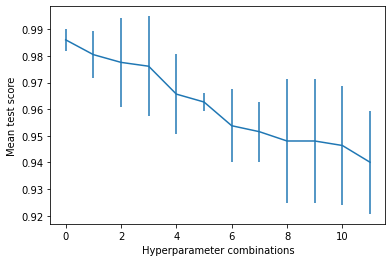

In [13]:
# plot model performance and error

results['mean_test_score'].plot(yerr=[results['std_test_score'], results['std_test_score']], subplots=True)

plt.ylabel('Mean test score')
plt.xlabel('Hyperparameter combinations')

In [16]:
# get the predictions

preds_train = search.predict(X_train)
preds_test = search.predict(X_test)

print('Train data score : {}'.format(accuracy_score(y_train, preds_train)))
print('Test data score : {}'.format(accuracy_score(y_test, preds_test)))

Train data score : 0.964824120603015
Test data score : 0.9590643274853801


- I think we can still do better by manipulating the hyper params